# Custom Odd-Even Classifier

First import all the necessary packages. Numpy for numercial calcultions, tensorflow for the MNIST dataset and matplotlib for plotting.

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Now, MNIST dataset is taken from keras datasets.

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0
y_train, y_test = y_train % 2, y_test % 2

Considering initial delta value as 0.01 and delta as 0.05

In [39]:
np.random.seed(42)
w1, G1 = np.random.randn(784) * 0.01, np.random.randn(784) * 0.01
b = 0.0
initial_eta, delta = 0.01, 0.05
epochs, batch_size = 40, 32

We initialize two lists to store the accuracy values. This will be used to plot the graphs

In [40]:
train_accs, test_accs = [], []

For training, a custom training loop is implemented bypassing tensorflow's built-in optimizer as expected.

This loop computes the z and entropy gradient (grad_z) and enforces the constraint. Zi+1 − Zi < δ. 
The D is taken as the sigmoid acitivation function as required.
This loop also accomodates the dynamic learning rates (eta).

In [41]:
for epoch in range(epochs):
    eta = initial_eta / (1 + 0.1 * epoch)
    for i in range(0, len(x_train), batch_size):
        x_batch, y_batch = x_train[i:i+batch_size], y_train[i:i+batch_size]
        z = np.dot(x_batch, (w1 + G1)) + b
        D = 1 / (1 + np.exp(-z))
        
        # Entropy gradient
        grad_z = (1 / np.log(2)) * z * D * (1 - D) * (D - y_batch)

        dw1, dG1 = np.dot(x_batch.T, grad_z) / batch_size, np.dot(x_batch.T, grad_z) / batch_size
        db = np.mean(grad_z)

        # Enforcing of the z Entropy constraint
        if i > 0:
            delta_z = np.abs(z - prev_z)
            scale_factor = np.minimum(1, delta / (delta_z + 1e-8))
            dw1 *= scale_factor.mean()
            dG1 *= scale_factor.mean()
            db *= scale_factor.mean()

        prev_z = z.copy()

        # Updating parameters
        w1 -= eta * dw1
        G1 -= eta * dG1
        b -= eta * db
    
    train_preds = (1 / (1 + np.exp(-np.dot(x_train, (w1 + G1)) - b)) >= 0.5).astype(int)
    test_preds = (1 / (1 + np.exp(-np.dot(x_test, (w1 + G1)) - b)) >= 0.5).astype(int)
    train_acc, test_acc = np.mean(train_preds == y_train), np.mean(test_preds == y_test)

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}, Learning Rate: {eta:.6f}")

Epoch 1/40, Train Accuracy: 0.6331, Test Accuracy: 0.6373, Learning Rate: 0.010000
Epoch 2/40, Train Accuracy: 0.6534, Test Accuracy: 0.6561, Learning Rate: 0.009091
Epoch 3/40, Train Accuracy: 0.6642, Test Accuracy: 0.6657, Learning Rate: 0.008333
Epoch 4/40, Train Accuracy: 0.6698, Test Accuracy: 0.6702, Learning Rate: 0.007692
Epoch 5/40, Train Accuracy: 0.6736, Test Accuracy: 0.6734, Learning Rate: 0.007143
Epoch 6/40, Train Accuracy: 0.6766, Test Accuracy: 0.6782, Learning Rate: 0.006667
Epoch 7/40, Train Accuracy: 0.6787, Test Accuracy: 0.6819, Learning Rate: 0.006250
Epoch 8/40, Train Accuracy: 0.6811, Test Accuracy: 0.6840, Learning Rate: 0.005882
Epoch 9/40, Train Accuracy: 0.6832, Test Accuracy: 0.6852, Learning Rate: 0.005556
Epoch 10/40, Train Accuracy: 0.6852, Test Accuracy: 0.6883, Learning Rate: 0.005263
Epoch 11/40, Train Accuracy: 0.6877, Test Accuracy: 0.6896, Learning Rate: 0.005000
Epoch 12/40, Train Accuracy: 0.6897, Test Accuracy: 0.6919, Learning Rate: 0.004762
E

Now, we plot the graph of accuracy values over training.

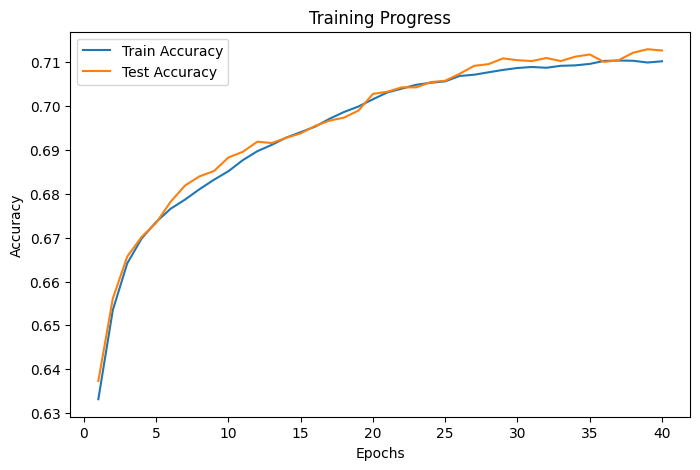

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_accs, label="Train Accuracy")
plt.plot(range(1, epochs + 1), test_accs, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Progress")
plt.legend()
plt.show()

Finially, for testing, we take 10 random images from the dataset and predict on it. The results are then plotted.

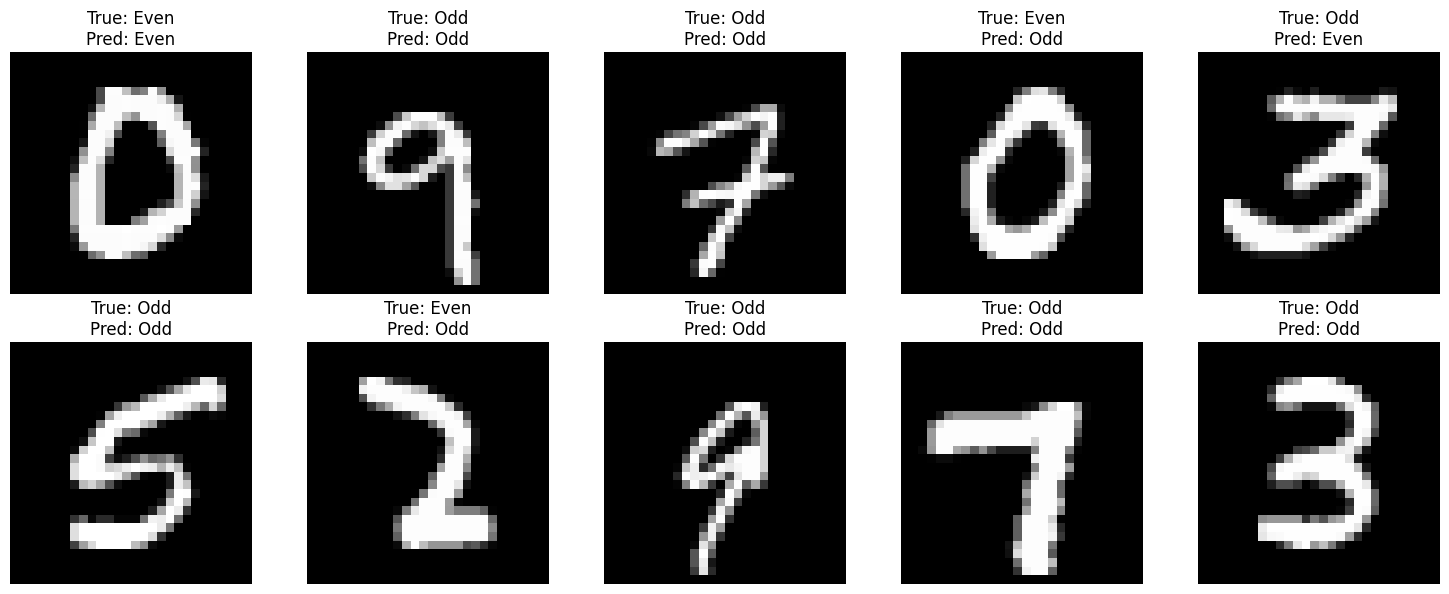

In [43]:
random_indices = np.random.randint(0, x_test.shape[0], size=10)
plt.figure(figsize=(15, 6))

for idx, i in enumerate(random_indices):
    image = x_test[i].reshape(28, 28)
    z_val = np.dot(x_test[i], (w1 + G1)) + b
    D_val = 1 / (1 + np.exp(-z_val))
    pred_label = 1 if D_val >= 0.5 else 0

    true_label = y_test[i]
    true_text = "Odd" if true_label == 1 else "Even"
    pred_text = "Odd" if pred_label == 1 else "Even"

    plt.subplot(2, 5, idx+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_text}\nPred: {pred_text}")
    plt.axis('off')

plt.tight_layout()
plt.show()